<a href="https://colab.research.google.com/github/mingshey/python_projects/blob/main/Polyfit_%EC%98%88%EC%A0%9C_%EC%9B%90%EC%9D%98_%EB%A9%B4%EC%A0%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Polyfit 예제3 - 원의 면적**

Archimedes 방법으로 원의 면적 구하기.

<img src="https://drive.google.com/uc?id=1q1SbpSc3dXAIcPTQi4Z1WTVO79HCXnO1"
 height=300 width=300 >

우리는 아르키메데스가 한 것처럼, 원을 6등분하여 구한 6개의 정삼각형의 면적을 $A_{0}$ 라 놓고 이것을 2등분해 나가며 원의 면적의 근삿값을 몇 차례 구한 다음, 외삽법을 이용하여 $n$이 무한대가 될 때의 값을 구할 계획이다.

반지름 $R$인 원의 중심각을 $n=6\times 2^{k}$ 등분한 부채꼴 중 하나에서 반지름과 현으로 둘러싸인 삼각형의 넓이를 $A_{k}$이라 하자. 이 삼각형에서 현의 길이의 $\dfrac{1}{2}$을 $S_{k}$이라 하고, 원의 중심에서 현의 중심을 잇는 선분의 길이를 $C_{k}$이라 하면
$$ A_{k} = C_{k}\times S_{k} $$ 이고, 이들 삼각형들의 넓이의 합은 $n A_{k}$ 이다.

중심각을 한 번 더 2등분하면 각각의 삼각형에 덧붙여져 증가된 면적은 $$ \Delta A_{k} = A_{k+1}-A_{k}=(R-C_{k})\times S_{k} $$이고, 전체 면적 증가는 $n\Delta A_{k}$이다.

다음 번 증가분, 즉 $\Delta A_{k+1}$의 반복계산에 사용할 $S_{k+1}$과 $C_{k+1}$은 각각
$$\begin{align}
S_{k+1} &= \dfrac{1}{2}\sqrt{(R-C_{k})^2+S_{k}^2},\\[10pt]
C_{k+1}&=\sqrt{R^2-S_{k+1}^2}.
\end{align}
$$

무한대는 컴퓨터가 처리할 수 없으므로, 각각의 $k$번째 단계에서 구한 면적을 $x=6/n$의 함수 $A(x)$로 간주하고 그것을 다항함수 $PF(x)$로 근사하여 $k$가 무한대, 즉 $x$가 $0$일 때의 극한값을 $PF(0)$의 값으로 근사하여 구한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
R=1
x=[1.0]
S = 1/2*R
C=np.sqrt(3)/2*R
n=[6]
A = [n[-1]*C*S]

for k in range(7):
  x.append(x[-1]/2)
  V=R-C
  DA = V*S
  A.append(A[-1]+n[-1]*DA)
  S=np.sqrt(V**2 + S**2)/2
  C=np.sqrt(R**2 - S**2)
  n.append(2*n[-1])

In [ ]:
x

[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125]

In [ ]:
n

[6, 12, 24, 48, 96, 192, 384, 768]

In [ ]:
A

[2.598076211353316,
 3.0,
 3.105828541230249,
 3.132628613281238,
 3.139350203046867,
 3.1410319508905093,
 3.1414524722854615,
 3.141557607911857]

`흠... 정 12면체의 면적이 정확히 $3R^2$이었군요. 기억해 둬야겠습니다.'
$$12\times \dfrac{1}{2} \times R \times R\sin{30^\circ}=3R^2 $$

In [ ]:
"""
마지막으로 구한 면적 값과 실제 원의 면적과의 상대 오차:
"""
print(f"Relative error of A[{k}]= {(A[-1]-np.pi*R**2)/np.pi:.2g}")

Relative error of A[6]= -1.1e-05


In [ ]:
"""
다항식 맞춤 계수
Polynomial Fitting Coefficients
"""
pc = np.polyfit(x,A,len(x)-1)
pc

array([ 2.45704558e-05, -8.38193029e-04,  4.53340050e-06,  3.14829214e-02,
        3.54422322e-08, -5.74190310e-01,  1.17428055e-11,  3.14159265e+00])

In [ ]:
"""
다항식 맞춤 함수
"""
pf = np.poly1d(pc)
print(f"pf(x) = \n{pf}")

pf(x) = 
           7             6             5           4             3
2.457e-05 x - 0.0008382 x + 4.533e-06 x + 0.03148 x + 3.544e-08 x
           2
 - 0.5742 x + 1.174e-11 x + 3.142


In [ ]:
xs = np.linspace(-0.2,1.2,100)
ys = pf(xs)

In [ ]:
pf(0)

3.1415926535897483

In [ ]:
print(f"Relative Error = {(pf(0)-np.pi*R**2)/np.pi:.2g}")

Relative Error = -1.4e-14


Text(0.5, 1.0, 'Area of a Circle; R=1')

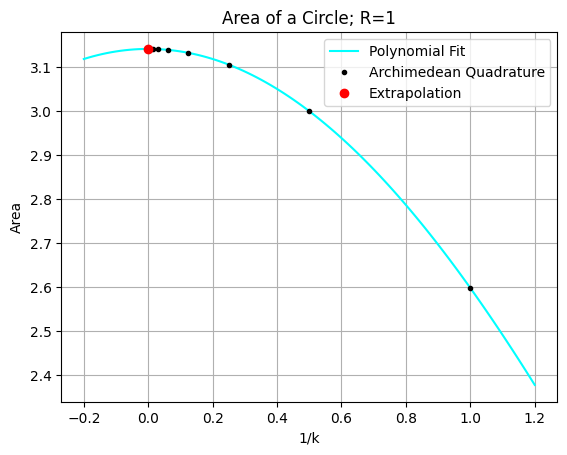

In [ ]:
plt.plot(xs,ys,color="cyan")
plt.plot(x,A,"k.")
plt.plot([0],[pf(0)],"ro")
plt.grid()
plt.xlabel("6/n")
plt.ylabel("Area")
plt.legend(["Polynomial Fit","Archimedean Quadrature","Extrapolation"])
plt.title(f"Area of a Circle; R={R:.2g}")

현대에 와서는 Chudnovsky 알고리즘 등을 이용하여 $\pi$의 값을 수십억 자리까지 구할 수 있으니 원의 면적이나 $\pi$ 값을 구하는 방법으로서는 위 방법이 그다지 인상적이지 않을 수 있습니다. 그러나 여기서는 직접 계산에 의한 값보다 훨씬 정밀한 값을 외삽법에 의하여 구할 수 있다는 점에 주목하시기 바랍니다. 직접 계산에 의하면 아르키메데스의 방법으로 $\pi$ 값을 소숫점 아래 6짜리까지 정확하게 구할 수 있는 데 비해, 같은 결과를 가지고 외삽법을 사용하여 정확한 자릿수를 2배 이상 증가시킬 수 있었습니다. 직접 계산에만 의존했다면 더 많은 횟수의 반복 계산이 필요했을 것입니다. 컴퓨터로는 직접 다룰 수 없는 극한 값을 외삽법을 이용하여 상당한 정확도로 추측할 수 있다는 것이 외삽법의 장점입니다.
물론 극한값이 없이 발산하는 사례에는 적용하기 어려울 것이므로 외삽법이 만능은 아닐 것이지만, 상당히 많은 분야에 사용할 수 있는 훌륭한 도구임에는 틀림없습니다.

우리는 원에 내접하는 다각형의 변의 수를 늘려가는 방법으로 원의 면적의 근삿값을 구해 봤는데요, 아르키메데스는 원에 내접하는 다각형과 외접하는 다각형의 면적으로 원의 면적의 범위를 구했습니다. 원에 외접하는 다각형을 6각형부터 시작하여 변의 수를 2배씩 늘려가는 방식으로 근삿값을 구하는 일은 과제로 남겨두겠습니다.